In [1]:
import dgl
import torch as th
import networkx as nx

/home/pengzhen/.conda/envs/d2l/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 定义顶点方向  0-1  0-2  ，0-3，1-3
u, v = th.tensor([0,0,0,1]),th.tensor([1,2,3,3])
g = dgl.graph((u,v))
print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [3]:
print(g.nodes())    # 获取顶点
print(g.edges())    # 获取边
print(g.edges(form = 'all'))  # 获取顶点和边

tensor([0, 1, 2, 3])
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


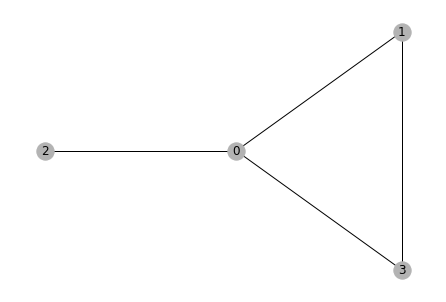

In [4]:
nx_G = g.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.kamada_kawai_layout
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])


In [2]:
# 创建异构图  
graph_data = {
    ('drug','interacts','drug'):(th.tensor([0,1]),th.tensor([1,2])),
    ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
    ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
} 
g = dgl.heterograph(graph_data)
g.ntypes

['disease', 'drug', 'gene']

In [3]:
g.etypes

['interacts', 'interacts', 'treats']

In [5]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [7]:
g.num_nodes()

10

In [9]:
g.num_nodes('gene')

4

In [23]:
g.nodes('gene')

tensor([0, 1, 2, 3])

In [30]:
g.nodes['drug'].data[]

SyntaxError: invalid syntax (4015840992.py, line 1)